# Mesures de performance

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/polyfinances-datathon-2023/series/close.csv
/kaggle/input/polyfinances-datathon-2023/series/sample_submission.csv
/kaggle/input/polyfinances-datathon-2023/series/open.csv
/kaggle/input/polyfinances-datathon-2023/series/dividend.csv
/kaggle/input/polyfinances-datathon-2023/series/adjusted_close.csv
/kaggle/input/polyfinances-datathon-2023/series/high.csv
/kaggle/input/polyfinances-datathon-2023/series/volume.csv
/kaggle/input/polyfinances-datathon-2023/series/low.csv
/kaggle/input/polyfinances-datathon-2023/series/split.csv
/kaggle/input/polyfinances-datathon-2023/series/benchmark/benchmark_returns.csv
/kaggle/input/polyfinances-datathon-2023/series/benchmark/SPY_returns.csv
/kaggle/input/polyfinances-datathon-2023/series/benchmark/benchmark_weights.csv
/kaggle/input/polyfinances-datathon-2023/series/benchmark/SPY.csv
/kaggle/input/polyfinances-datathon-2023/series/additional_data/SP500_symbol_info.csv
/kaggle/input/polyfinances-datathon-2023/series/additional_data/us_infl

La valeur ajoutée annualisée est de 162.97%
Le risque actif annualisé est de 12.90%
Le ratio d'information annualisé est de 12.64
Le pire rabattement relatif de la stratégie est :-1.00%
Le nombre moyen de titres détenus est : 2.8
Le roulement annuel moyen est de: 42.84 %


<Axes: title={'center': 'Allocation sectorielle à travers le temps'}, xlabel='Temps', ylabel='Poids'>

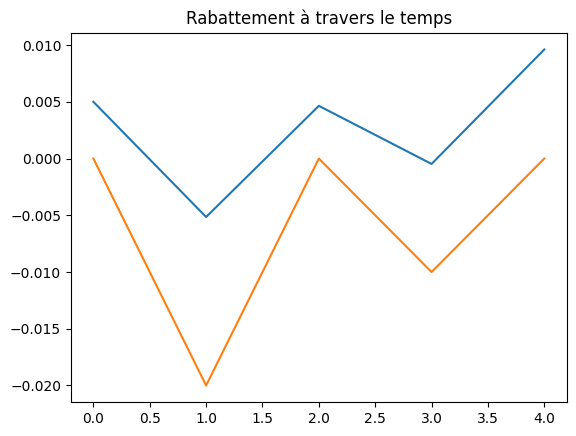

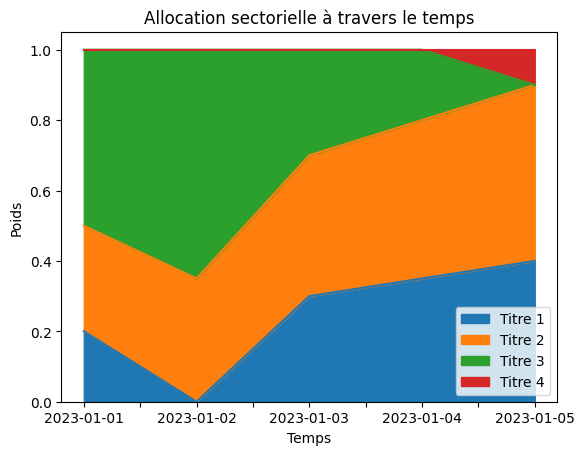

In [2]:
### Mesures pour le backtest d'une stratégie
# Importer pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### A. Données
# Définir le rendement quotidien du portefeuille et de l'indice
portfolio_return = pd.Series([0.01, -0.02, 0.03, -0.01, 0.02])
index_return = pd.Series([0.005, -0.01, 0.02, -0.005, 0.01])
# Créer un dataframe avec les poids des titres financiers à  une fréquence quotidienne
df = pd.DataFrame({"Date": ["2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05"],
                   "Titre 1": [0.2, 0, 0.3, 0.35, 0.4],
                   "Titre 2": [0.3, 0.35, 0.4, 0.45, 0.5],
                   "Titre 3": [0.5, 0.65, 0.3, 0.2, 0],
                   "Titre 4": [0, 0, 0, 0, 0.1]})
df = df.set_index("Date")

### B. Mesures
# 1. Valeur ajoutée annualisée
# Calculer le rendement annualisé du portefeuille et de l'indice
portfolio_annualized_return = (1 + portfolio_return).prod() ** (252 / len(portfolio_return)) - 1
index_annualized_return = (1 + index_return).prod() ** (252 / len(index_return)) - 1
# Calculer la valeur ajoutée annualisée
added_value_annualized = portfolio_annualized_return - index_annualized_return
print(f"La valeur ajoutée annualisée est de {added_value_annualized:.2%}")

###
# 2. Risque actif annualisé
# Calculer le rendement excédentaire du portefeuille par rapport à l'indice
excess_return = portfolio_return - index_return
# Calculer le risque actif annualisé
active_risk_annualized = np.std(excess_return) * np.sqrt(252)
print(f"Le risque actif annualisé est de {active_risk_annualized:.2%}")

###
# 3. Ratio d'information annualisé
# Calculer le ratio d'information annualisé
information_ratio_annualized = added_value_annualized / active_risk_annualized
print(f"Le ratio d'information annualisé est de {information_ratio_annualized:.2f}")

###
# 4. Pire rabattement relatif
# Calculer la valeur cumulée du portefeuille à chaque date
portfolio_value = (1 + portfolio_return).cumprod()
# Calculer la valeur cumulée de l'indice de référence à chaque date
index_value = (1 + index_return).cumprod()
# Calculer le pic cumulé du portefeuille à chaque date
portfolio_peak = portfolio_value.cummax()
# Calculer le pic cumulé de l'indice de référence à chaque date
index_peak = index_value.cummax()
# Calculer le rabattement du portefeuille à chaque date
portfolio_drawdown = (portfolio_value - portfolio_peak) / portfolio_peak
# Calculer le rabattement de l'indice de référence à chaque date
index_drawdown = (index_value - index_peak) / index_peak
# Calculer le pire rabattement du portefeuille
portfolio_worst_drawdown = portfolio_drawdown.min()
# Calculer le pire rabattement de l'indice de référence
index_worst_drawdown = index_drawdown.min()
# Calculer le pire rabattement relatif d'une stratégie
relative_worst_drawdown = portfolio_worst_drawdown - index_worst_drawdown
print(f"Le pire rabattement relatif de la stratégie est :{relative_worst_drawdown:.2%}")

###
# 5. Nombre moyen de titres détenus
# Calculer le nombre de titres détenus à chaque date
number_of_stocks = df.apply(lambda x: (x > 0).sum(), axis=1)
# Calculer le nombre moyen de titres détenus sur la période
average_number_of_stocks = number_of_stocks.mean()
# Afficher le résultat
print("Le nombre moyen de titres détenus est :", average_number_of_stocks)

###
# 6. Calcul du taux de roulement
# Calculer le changement de poids par titre par date
weight_change = df.diff().abs()
# Calculer le roulement total à chaque date
turnover_total = weight_change.sum(axis=1)
# Diviser le roulement total par deux
turnover_total = turnover_total / 2
# Calculer le roulement annuel moyen sur la période
turnover_annual = turnover_total.mean() * 252
print("Le roulement annuel moyen est de:", turnover_annual,"%")

### C. Visualisations
# 1. Valeur ajoutée cumulée
# Calculer la valeur ajoutée cumulée à travers le temps
valeur_ajoutee_cumulee = portfolio_value - index_value
valeur_ajoutee_cumulee.plot(title="Valeur ajoutée cumulée à travers le temps")

# 2. Pire rabattement
# Visualiser le pire rabattement à travers le temps
portfolio_drawdown.plot(title="Rabattement à travers le temps")

# 3. Allocation sectorielle
# Tracer les poids des secteurs en fonction du temps
df.plot(title="Allocation sectorielle à travers le temps", xlabel="Temps", ylabel="Poids", kind="area", stacked=True)

# Données

In [3]:
%%capture 
pip install yfinance

In [4]:
ROOT='/kaggle/input/polyfinances-datathon-2023/series/' 
bmrk = pd.read_csv(ROOT+'benchmark/SPY.csv',index_col=1).drop(columns=['Unnamed: 0'])
bmrk.index = pd.to_datetime(bmrk.index)
bmrk.head()

,open,high,low,close,adjusted_close,volume,dividend,split
timestamp,,,,,,,,
2023-10-20,425.98,426.54,421.080,421.19,421.19,123919874,0.0,1.0
2023-10-19,430.95,432.82,425.725,426.43,426.43,121322957,0.0,1.0
2023-10-18,434.19,435.18,429.090,430.21,430.21,93559798,0.0,1.0
2023-10-17,432.81,438.14,432.450,436.02,436.02,75324708,0.0,1.0
2023-10-16,433.82,437.14,433.570,436.04,436.04,75433194,0.0,1.0


NameError: name 'results' is not defined

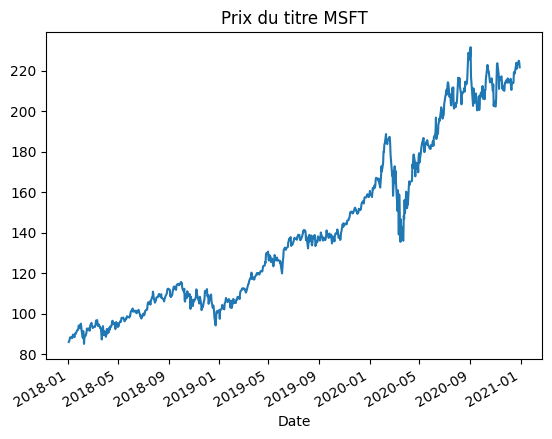

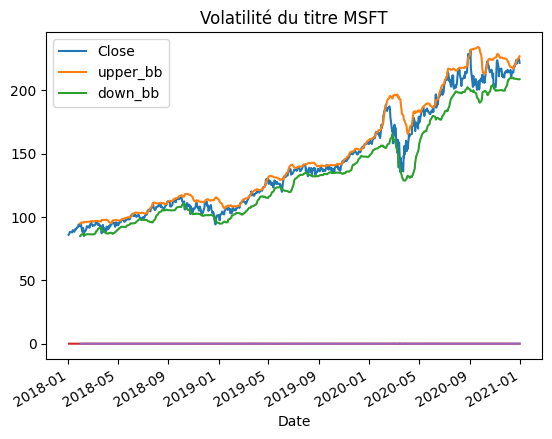

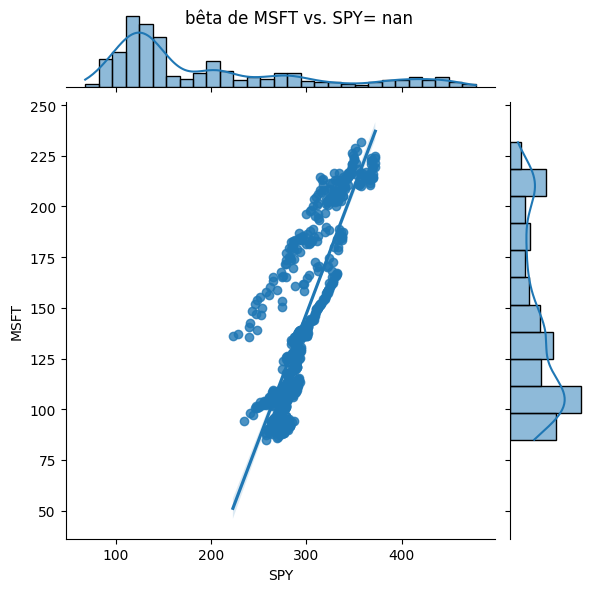

In [5]:
### SECTION DONNÉES

import pandas as pd
import yfinance as yf
import seaborn as sns

# Obtenir la liste des symboles du S&P500
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
symbols = df['Symbol'].to_list()

# Données de prix de MSFT
data = yf.download("MSFT", start='2018-01-01', end='2020-12-31', progress=False)
data["Close"].plot(title = 'Prix du titre MSFT')

# Visulisation des bandes de Bollinger sur n jours
n = 20
data["moving_average_20"] = data["Close"].rolling(n).mean()
data["sigma"] = data["Close"].rolling(n).std()
data["upper_bb"] = data["moving_average_20"] + 2 * data["sigma"]
data["down_bb"] = data["moving_average_20"] - 2 * data["sigma"]
data[["Close", "upper_bb", "down_bb"]].plot(title = 'MSFT, bandes de Bollinger à 20 jours')

# Visualisation de rendements et de volatilité de MSFT
data["Close"].pct_change().plot(title = 'Rendements de MSFT')
data["Close"].pct_change().rolling(20).std().plot(title = 'Volatilité du titre MSFT')

import statsmodels.api as sm
from statsmodels import regression

# Calcul du bêta
beta_df = pd.concat([data["Close"], bmrk["close"]], axis=1)
beta_df.columns = ['MSFT','SPY']

# Prendre les rendements et enlever la première valeur car NaN
X = beta_df["SPY"].pct_change()[1:]
Y = beta_df["MSFT"].pct_change()[1:]

# Rajouter une constante et fitter une régression linéaire
X = sm.add_constant(X)
model = regression.linear_model.OLS(Y,X).fit()
model.summary()
beta = model.params[1]
alpha = model.params[0]

p = sns.jointplot(x = 'SPY'
                , y = "MSFT"
                , data = beta_df
                , kind="reg")
p.fig.suptitle(f"bêta de MSFT vs. SPY= %.3f" %beta)

# Regression model
Y = data["Close"].pct_change()[1:]
X = bmrk["close"].pct_change()[1:]

# Données fondamentales
ticker = "MSFT"
data_yf = yf.Ticker(ticker)
data_yf.get_balance_sheet().index
data_yf.get_cashflow().index
data_yf.get_income_stmt().index
data_yf.dividends
data_yf.major_holders

# Calcul de la part des bénéfices vs. revenus totaux
#results = {'ticker': [], 'NetIncome': [], 'TotalRevenue': [], 'EPS': []}
#for individual_ticker in list(financial_ratios['ticker']):
#    resultats_financiers = yf.Ticker(individual_ticker).get_income_stmt()
#    champs_index    = resultats_financiers.index.str.lower()
#    net_income      = resultats_financiers.loc[champs_index.isin(['net income', 'netincome'])].iloc[:, 0][0]
#    total_revenue   = resultats_financiers.loc[champs_index.isin(['totalrevenue', 'total revenue'])].iloc[:, 0][0]
#    eps             = resultats_financiers.loc[champs_index.isin(['eps', 'basiceps'])].iloc[:, 0][0]

#    results['ticker'].append(individual_ticker)
#    results['NetIncome'].append(net_income)
#    results['TotalRevenue'].append(total_revenue)
#    results['EPS'].append(eps)

df = pd.DataFrame(results)

# Transformations

In [ ]:
### SECTION ratios, transformation de donnéees
import seaborn as sns
import numpy as np
import scipy as sp

df['PartDeBénéfices'] = df['NetIncome'] / df['TotalRevenue']
df.plot.scatter(y = 'PartDeBénéfices', x='EPS')

df = df.dropna()
p = sns.jointplot(x = 'PartDeBénéfices'
                , y = "EPS"
                , data = df
                , kind="reg")
p.fig.suptitle(f"r^2 = %.3f" %r)

# Nettoyer les données abérrentes
df_outliers = df.loc[ (df['PartDeBénéfices'] <= 0.6)
                    & (df['PartDeBénéfices'] >= 0)
                    & (df['EPS'] <= 100)]
df_outliers['PartDeBénéfices_log'] = np.log(df_outliers['PartDeBénéfices'])
df_outliers['EPS_log'] = np.log(df_outliers['EPS'])

df_outliers = df_outliers.dropna()
r, p = sp.stats.pearsonr(df_outliers['PartDeBénéfices_log'],
                         df_outliers['EPS_log'])

# Modéliser la relation entre les 2 variables
r, p = sp.stats.pearsonr(df_outliers['PartDeBénéfices_log'],
                         df_outliers['EPS_log'])
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df_outliers['PartDeBénéfices_log']
                                                                 ,df_outliers['EPS_log'])

# Visualiser la relation
p = sns.jointplot(x = 'PartDeBénéfices_log'
                , y = "EPS_log"
                , data = df_outliers
                , kind="reg")
p.fig.suptitle(f"r^2 = %.3f \nbêta = 0.47" %r)
print('bêta: ', np.round(slope,2))

# Winsorizer les données
from scipy.stats.mstats import winsorize
df["PartDeBénéfices_winz"] = winsorize(df['PartDeBénéfices'], limits=(0.01, 0.01))
df["EPS_winz"] = winsorize(df['EPS'], limits=(0.01, 0.01))

# Normaliser les données
df["PartDeBénéfices_norm"] = (df["PartDeBénéfices_winz"]-df["PartDeBénéfices_winz"].mean())/df["PartDeBénéfices_winz"].std()
df["EPS_norm"] = (df["EPS_winz"]-df["EPS_winz"].mean())/df["EPS_winz"].std()

# Données descriptives et distribution
df[["PartDeBénéfices","PartDeBénéfices_winz", "PartDeBénéfices_norm"]].describe()
df[["EPS","EPS_winz", "EPS_norm"]].describe()

sns.histplot(data=df, x="PartDeBénéfices", kde=True)
sns.histplot(data=df, x="PartDeBénéfices_winz", kde=True)
sns.histplot(data=df, x="PartDeBénéfices_norm", kde=True)

sns.histplot(data=df, x="EPS", kde=True)
sns.histplot(data=df, x="EPS_winz", kde=True)
sns.histplot(data=df, x="EPS_norm", kde=True)